In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = load_digits()
X = df.data
y = df.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [4]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Checking the accuracy score

In [5]:
predictions = model.predict(X_test)

In [6]:
score = accuracy_score(y_test, predictions) #accuracy score is not a suitable way to evaluate model
score

0.9472222222222222

# Cross validation score

In [7]:
cvs = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy',)
cvs.mean()

0.9596381350034795

In [8]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
y_train_pred

array([3, 5, 0, ..., 1, 0, 6])

# Plotting Confusion Matrix

<AxesSubplot:>

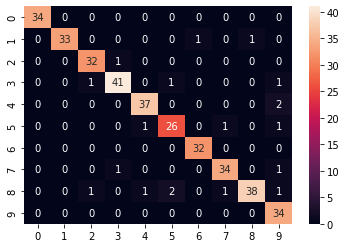

In [9]:
cm = confusion_matrix(y_test, predictions)
sn.heatmap(cm, annot=True)

# A confusion matrix with no error at all

<AxesSubplot:>

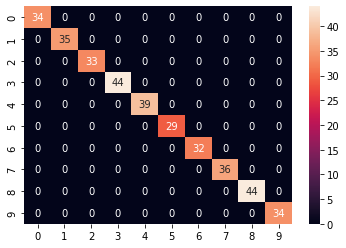

In [10]:
sn.heatmap(confusion_matrix(y_test, y_test), annot=True) #observe all the zero values at non-diagonal positions

# Precision, Recall and F1 Score

In [11]:
precision_score(y_train, y_train_pred, average='macro')

0.9599812750159785

In [12]:
recall_score(y_train, y_train_pred, average='macro')

0.9592894084329121

In [13]:
f1_score(y_train, y_train_pred, average='macro')

0.959499786477339

In [14]:
y_scores = cross_val_predict(model, X_train, y_train, cv=3, method='decision_function')
y_scores

array([[ -3.18509114,  -4.3896758 ,   8.90808862, ...,  -1.48137467,
          3.78238906,   3.47523044],
       [ -0.33659619, -13.31972755,  -4.22486258, ...,  -7.72896099,
          2.40718513,  11.1884249 ],
       [ 18.743396  ,  -4.12424218,  -0.82177269, ...,   2.91684192,
         -1.60529592,  -5.41378182],
       ...,
       [ -4.62114187,  10.48038357,   3.55114251, ...,  -7.86073166,
          7.58665179,  -7.217617  ],
       [ 20.70593689,  -8.42153125,  -7.1724434 , ...,  -5.36622245,
          4.39187201,  -3.37401028],
       [  0.93293884,   3.98975813,  -5.20451379, ...,  -8.11050981,
          7.88248669,  -9.33906996]])